In [5]:
# Use base (Python 3.9.13)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", message="is_sparse is deprecated", category=FutureWarning)


In [2]:
df = pd.read_csv("FINAL-DATA-TO-BE-MODELED.csv")
df = df.drop("Unnamed: 0", axis = 1)
df.dropna(inplace=True)

In [6]:
# Extract features (X) and targets (y)
features = df.iloc[:, 4:-3]  # Assuming columns 5 to -4 are your input features
targets = df[['Lull', 'Average', 'Gust']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model using Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3)  # Output layer with 3 neurons for Lull, Average, and Gust
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use mean squared error as the loss function

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss}')


Test Loss: 16.670602798461914


FIRST SET OF TESTING

In [7]:
twotwo_aug_first = df.iloc[2008:2017]
twotwo_june_six = df.iloc[4106:4116]
twozero_aug_fifteen = df.iloc[130:139]
onenine_june_twelve = df.iloc[390:400]
twotwo_sep_fifteen = df.iloc[699:707]
days = [twotwo_aug_first, twotwo_june_six, twozero_aug_fifteen, onenine_june_twelve, twotwo_sep_fifteen]

1/1 [==============================] - 0s 89ms/step


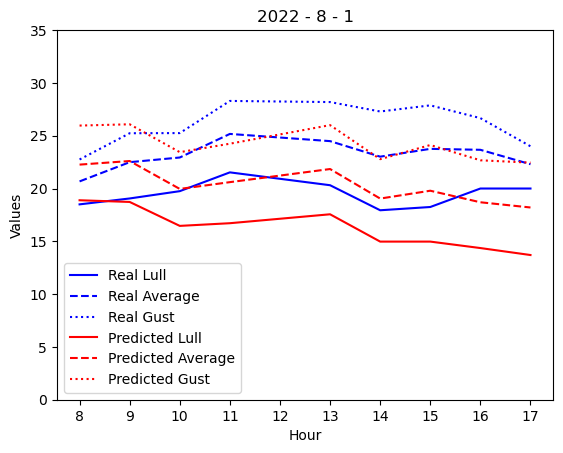

1/1 [==============================] - 0s 40ms/step


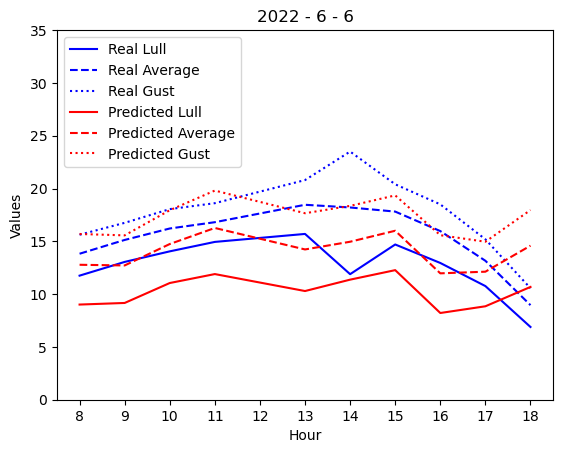

1/1 [==============================] - 0s 24ms/step


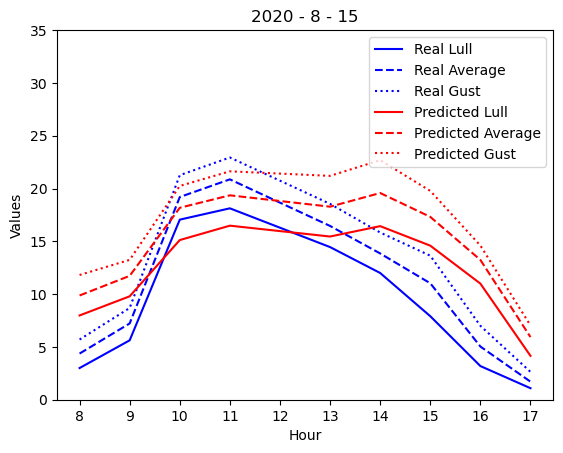

1/1 [==============================] - 0s 21ms/step


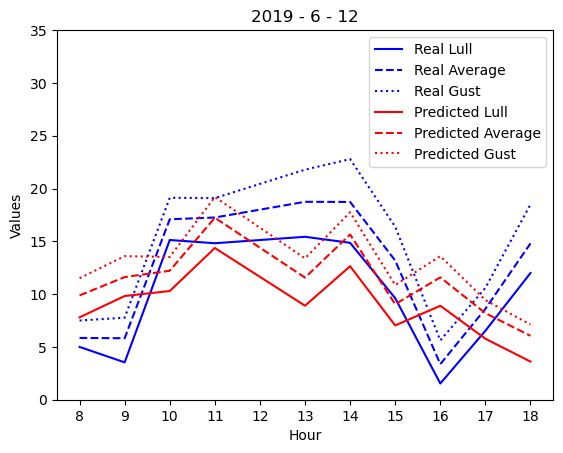

1/1 [==============================] - 0s 23ms/step


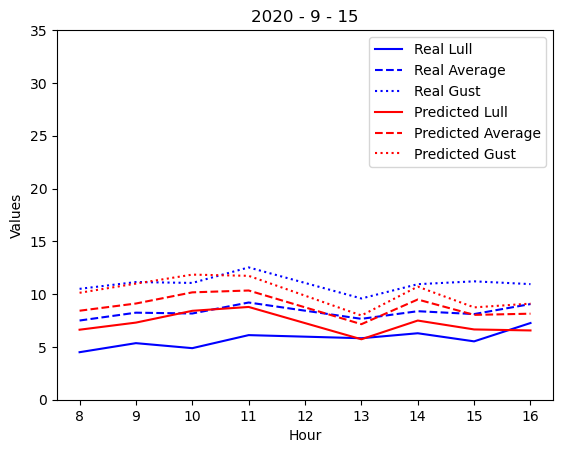

In [8]:
# Define the subsets
days = [twotwo_aug_first, twotwo_june_six, twozero_aug_fifteen, onenine_june_twelve, twotwo_sep_fifteen]

# Iterate through each subset and print predictions for the last 3 columns
for day in days:
    # Extract features from the subset
    features_subset = day.iloc[:, 4:-3]

    # Standardize the input features
    features_scaled = scaler.transform(features_subset)

    # Make predictions
    predictions = model.predict(features_scaled)
    predictions_df = pd.DataFrame(predictions, columns=['Lull', 'Average', 'Gust'])

    # Visualizing results.
    # Plot real values in blue
    plt.plot(day['Hour'], day['Lull'], label='Real Lull', color='blue')
    plt.plot(day['Hour'], day['Average'], label='Real Average', color='blue', linestyle='dashed')
    plt.plot(day['Hour'], day['Gust'], label='Real Gust', color='blue', linestyle='dotted')

    # Plot predictions in red
    plt.plot(day['Hour'], predictions_df['Lull'], label='Predicted Lull', color='red')
    plt.plot(day['Hour'], predictions_df['Average'], label='Predicted Average', color='red', linestyle='dashed')
    plt.plot(day['Hour'], predictions_df['Gust'], label='Predicted Gust', color='red', linestyle='dotted')

    # Set plot labels and title
    plt.xlabel('Hour')
    plt.ylabel('Values')
    plt.title(f"{day['Year'].values[0]} - {day['Month'].values[0]} - {day['Day'].values[0]}")

    # Show legend
    plt.legend()
    
    plt.xticks(np.arange(day['Hour'].min(), day['Hour'].max()+1, 1))
    plt.ylim(0, 35)

    # Show the plot
    plt.show()